[California Housing Prices](https://www.kaggle.com/camnugent/california-housing-prices)

# 1. Overview

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_theme()

In [2]:
df_housing = pd.read_csv("Data/Cali_Housing.csv")
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


* The column `total_bedrooms` has fewer values (`count`) than the rest, 20433 compared to 20640. This indicates that there are more than 200 missing values here.

* The `total_rooms`, `total_bedrooms`, `population`, and `median_income` columns have the largest values far beyond the third percentile (75%) of those columns.

* The `median_house_value` column has a relatively extensive range of values, with the highest value being $500001. Most likely, the values in this column have been truncated at this value.

In [4]:
# Cate ocean_proximity -> value_counts
df_housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# 2. Destiny = Histogram + KDE

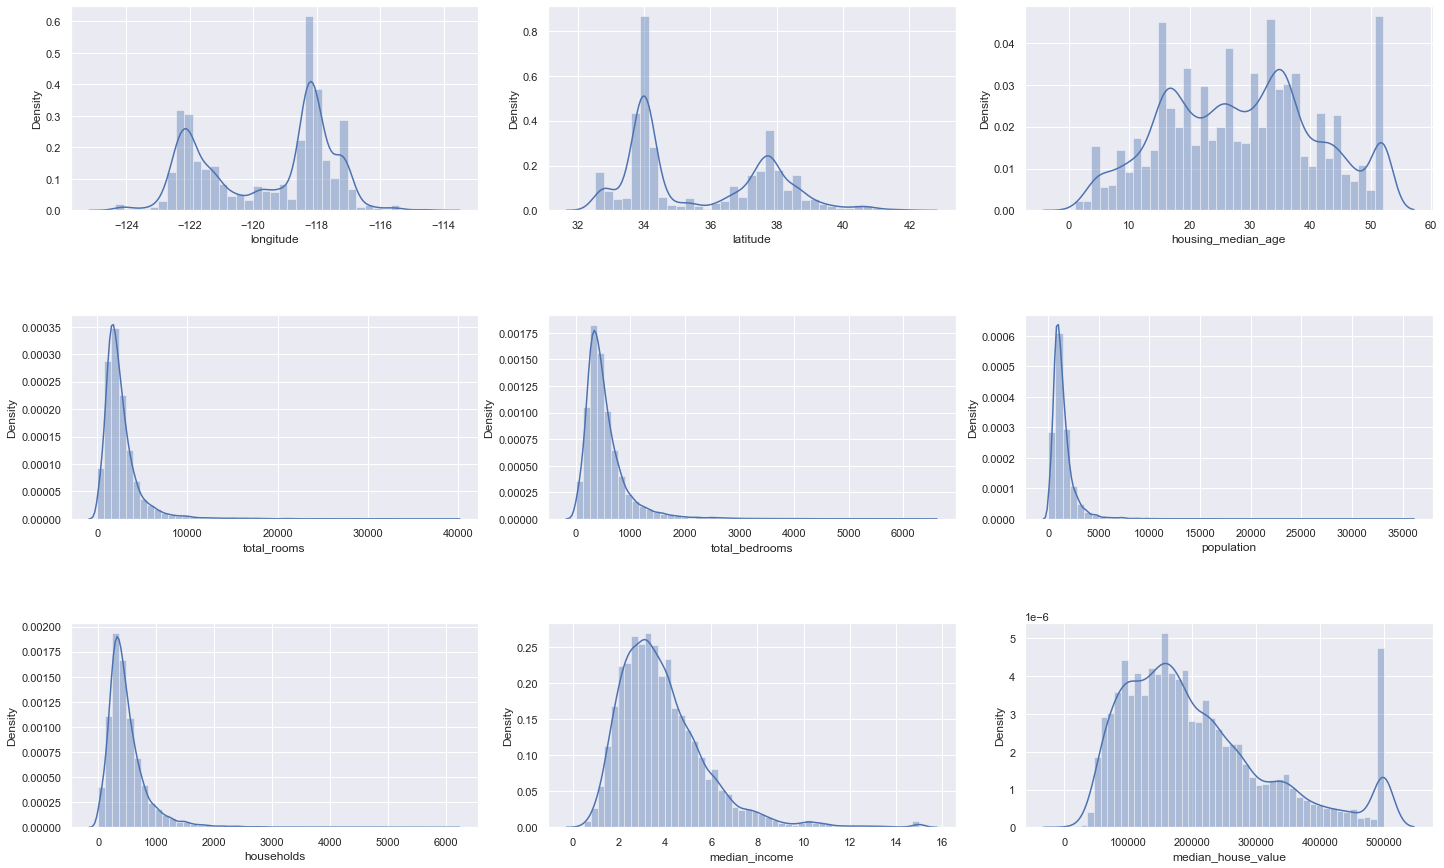

In [5]:
# Destiny
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize=(20, 12))
index = 0
axs = axs.flatten()
for k,v in df_housing.items():
    sns.distplot(v, ax=axs[index])
    index += 1
    if index == 9:
        break
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show();

* Based on the graphs of `longitude` and `latitude`, we see two geographic areas where many data points are concentrated. These are likely to be two large urban areas with many satellite towns. A little knowledge of California allows us to predict that this is near San Francisco and Los Angeles.

* The `housing_median_age` and `median_house_value` columns have higher final bins than nearby bins, indicating the possibility of truncated values ​​(_clip_) at those values. I.e. larger values ​​are converted to the matter at the cutoff point.

* The columns `total_rooms, total_bedroooms, population, households` have most of their values ​​concentrated in the first bins; the later bins are very long but have few values. The data distribution where the data is focused on one direction is called a "long tail" or skewed (_skewed_). The distributions, in this case, are _right-skewed distribution_. Right-shift here refers to the "long tail" part of the histogram, not the domain to which the data mainly belongs. For these fields, the truncation technique at a possible value is often used in the same way that data is generated in `housing_median_age` and `median_house_value`.


# 3. Correlation by Pairplot (Scatter)

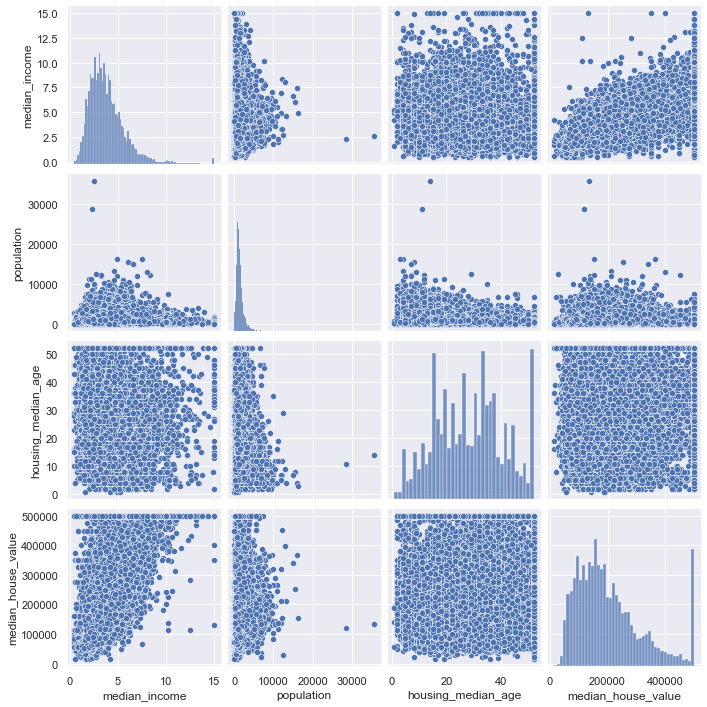

In [6]:
columns_correlation = ["median_income", "population", "housing_median_age", "median_house_value"]

sns.pairplot(df_housing[columns_correlation]);

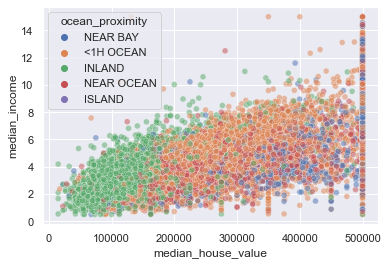

In [7]:
# Scale median_house_value & median_income
# Label to classificate (only for category)
ocean_proximity = df_housing["ocean_proximity"]

# Scatter median_house_value & median_income
sns.scatterplot(df_housing["median_house_value"], df_housing["median_income"], alpha=0.5, hue = ocean_proximity);

We observe that areas with high median income (`median_income`) tend to have higher prices. The truth is that this isn't quite the case when, on the far right, house prices are at their highest, but median income ranges from near lowest to near highest. However, much of the data follows the law that as income increases, house prices rise. In addition, we have two other observations:

* The data points are mainly located in the lower-left part; the density of points in the remaining cells is relatively sparse.

* In addition to the column corresponding to the highest house price, there are many "columns" with many concentration points. For example, there are quite a few points with a house price of about $350k and $450k in the column. This makes sense since prices are often around round numbers ($449k, $450k, etc.).

* Low-income areas still have more expensive homes (lower right) than low-value homes in high-income areas (upper left).

# 4. Map 

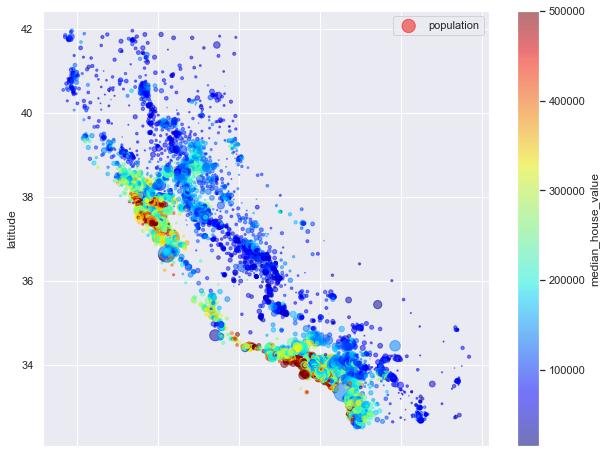

In [8]:
df_housing.plot(
    kind="scatter",
    x="longitude",y="latitude",
    alpha=0.5,
    s=df_housing["population"]/100,
    label="population",
    figsize=(10, 8),
    c="median_house_value",
    cmap=plt.get_cmap("jet"),
    colorbar=True
)
plt.legend();

In the map above, each circle corresponds to a data point with a radius representing population (the `population` column) and a colour representing house prices with blue for low and dark red for high. We see two large residential clusters on the coast with very high house prices.

Compared to the actual state of California, it is true that the `Bay Area` to the north and `Los Angeles` to the south are indeed large residential areas with expensive housing.

![](Data/2021-12-30-18-05-49.png)